In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.cluster.hierarchy as shc

from sklearn.preprocessing import MinMaxScaler

from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

from sklearn.metrics import confusion_matrix

from sklearn import datasets

%matplotlib inline
pd.set_option("display.max_columns", None)

In [53]:
# load in the data
airbnb = pd.read_csv("filtered_nyc_airbnb_2019.csv")
airbnb = airbnb.dropna()
airbnb.head()

,Unnamed: 0,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3,3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


In [60]:
# remove boroughs and room types
X = airbnb.iloc[:, [7, 8, 10, 11, 12, 14, 15, 16]]
X.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,40.64749,-73.97237,149,1,9,0.21,6,365
1,40.75362,-73.98377,225,1,45,0.38,2,355
3,40.68514,-73.95976,89,1,270,4.64,1,194
4,40.79851,-73.94399,80,10,9,0.10,1,0
5,40.74767,-73.97500,200,3,74,0.59,1,129


In [61]:
# scale the data 
scaler = MinMaxScaler(feature_range=(0, 1))
airbnb_scaled = scaler.fit_transform(X)

In [62]:
# turn the scaled data back to a dataframe
airbnb_scaled = pd.DataFrame(airbnb_scaled, columns = X.columns)
airbnb_scaled.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,0.346932,0.511921,0.298,0.000000,0.012739,0.003419,0.015337,1.000000
1,0.607918,0.490469,0.450,0.000000,0.070064,0.006326,0.003067,0.972603
2,0.439518,0.535649,0.178,0.000000,0.428344,0.079159,0.000000,0.531507
3,0.718308,0.565324,0.160,0.300000,0.012739,0.001539,0.000000,0.000000
4,0.593287,0.506972,0.400,0.066667,0.116242,0.009916,0.000000,0.353425


In [63]:
# run k-means clustering on the data
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans_clusters = kmeans.fit_predict(airbnb_scaled)
kmeans_clusters

array([0, 0, 0, ..., 2, 2, 2])

In [64]:
# add the clusters to the dataset
airbnb["kmeans_clusters"] = kmeans_clusters

In [65]:
airbnb["room_type"].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [73]:
first_kmean_cluster_filter = airbnb["kmeans_clusters"] == 0
first_kmean_cluster = airbnb[first_kmean_cluster_filter]
first_kmean_cluster.sample(15)

,Unnamed: 0,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,kmeans_clusters
3367,3564,2127767,Sun-drenched 2 Bedroom Penthouse,923915,Matthew,Manhattan,East Village,40.72476,-73.97643,Entire home/apt,250,4,34,2016-11-21,0.52,2,239,0
34003,35350,28044146,J- **LUXURY SHARED ROOM 2PPL FREE WIFI+CABLE+AC,8814258,Nikole,Queens,South Ozone Park,40.67286,-73.79666,Shared room,29,5,1,2018-09-14,0.10,7,365,0
15045,15696,12680171,Near all shopping & transportation,68848703,Rupi,Queens,Forest Hills,40.71933,-73.84984,Private room,119,2,21,2019-05-16,0.57,2,363,0
38756,40315,31267520,Mott Haven Dorm-Bed F,174785358,Rem,Bronx,Port Morris,40.80940,-73.93173,Shared room,28,1,17,2019-06-18,2.77,7,319,0
44558,46427,35240989,Gorgeous One Bedroom Apartment With Private Ga...,265169106,Austin,Manhattan,Harlem,40.80618,-73.94618,Entire home/apt,179,2,3,2019-06-10,3.00,1,187,0
45724,47650,35845267,"Modern Astoria ""Crib""",269635110,Niko,Queens,Long Island City,40.75527,-73.93125,Entire home/apt,125,2,1,2019-06-23,1.00,1,346,0
938,990,399946,Light Superhosted Chill LES Apt,1996265,David,Manhattan,Lower East Side,40.72123,-73.98996,Private room,90,10,67,2019-05-16,0.77,1,301,0
7905,8316,6395433,Charming Private Suite in the South Bronx,23693099,Justin,Bronx,Concourse Village,40.82809,-73.91590,Entire home/apt,65,4,107,2019-06-24,2.30,1,210,0
17512,18242,14301857,Large Modern Studio with Free Parking in Driveway,47901176,Will & Clara,Queens,Ridgewood,40.70882,-73.91790,Entire home/apt,135,2,73,2019-07-06,2.11,1,345,0
38121,39651,30859271,"Comfortable, Quiet, And A Good Night Sleep.",214678935,Kin,Brooklyn,Sunset Park,40.64650,-74.01454,Private room,55,1,14,2019-07-01,2.20,3,174,0


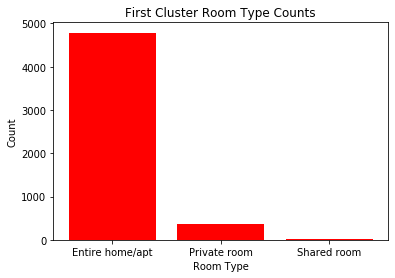

In [136]:
vc = first_kmean_cluster["room_type"].value_counts()
plt.bar(vc.index, vc.values, color = "red")
plt.title("First Cluster Room Type Counts")
plt.xlabel("Room Type")
plt.ylabel("Count")
plt.savefig("plots/first_cluster_room_type.png")

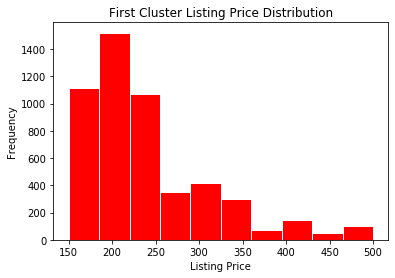

In [137]:
first_kmean_cluster["price"].hist(grid = False, edgecolor = "white", color = "red")
plt.title("First Cluster Listing Price Distribution")
plt.xlabel("Listing Price")
plt.ylabel("Frequency")
plt.savefig("plots/first_cluster_price_dist.png")

In [70]:
second_kmean_cluster_filter = airbnb["kmeans_clusters"] == 1
second_kmean_cluster = airbnb[second_kmean_cluster_filter]
second_kmean_cluster.sample(15)

,Unnamed: 0,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,kmeans_clusters
3517,3744,2254817,Elegant private studio in Manhattan 73 St. & 3...,9420221,Kourosh,Manhattan,Upper East Side,40.76886,-73.95877,Entire home/apt,130,30,3,2019-06-30,0.39,1,156,1
1213,1279,550653,Sun Fill Room in a Spacious Apt,2706505,Huxley,Brooklyn,Windsor Terrace,40.65990,-73.98279,Private room,65,20,6,2018-09-30,0.32,1,311,1
32662,33946,26884320,Charming Room with 2 Beds+ Laundry in Williams...,141204556,Aaron & Ivy,Brooklyn,Williamsburg,40.71090,-73.96478,Private room,109,30,43,2019-06-06,3.72,2,365,1
1747,1843,820801,"Sunny 2BD, 2 balconies",25632,LeeAnn,Brooklyn,Greenpoint,40.72103,-73.94798,Entire home/apt,300,30,1,2014-09-12,0.02,1,0,1
39714,41322,32178172,2BED 2 BATH/COLUMBUS CIRCLE/ BALCONY,131647128,Emily,Manhattan,Upper West Side,40.77054,-73.98344,Entire home/apt,290,30,2,2019-03-21,0.52,25,313,1
15680,16361,13156126,"Brownstone garden 2 bedroom duplex, Central Park",5162192,Amy,Manhattan,Upper West Side,40.79831,-73.96052,Entire home/apt,202,30,8,2019-05-20,0.30,12,147,1
35301,36686,29159920,Suite East Side - FREE street parking & wifi,219738858,Joe,Manhattan,Lower East Side,40.72074,-73.98487,Entire home/apt,195,30,21,2019-06-21,2.43,5,117,1
31153,32385,25348299,Stunning Designer 3 bdrm apt 25 min to Manhattan,8013853,Seth,Brooklyn,Bedford-Stuyvesant,40.68412,-73.94836,Entire home/apt,85,30,16,2019-06-14,1.18,1,318,1
9734,10203,7819539,1BR GARDEN APT 25 MIN TO MANHATTAN,5623834,Anna,Brooklyn,East Flatbush,40.64569,-73.94776,Entire home/apt,100,30,29,2019-05-22,0.74,1,326,1
37459,38953,30445079,Spiritual Oasis in the East Village,37254146,Atma,Manhattan,East Village,40.72877,-73.98249,Entire home/apt,189,19,1,2019-01-04,0.16,1,200,1


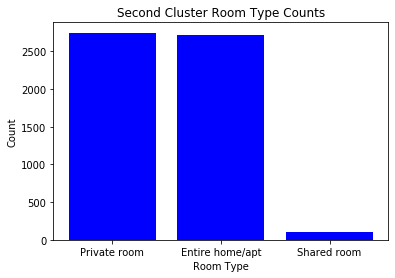

In [138]:
vc = second_kmean_cluster["room_type"].value_counts()
plt.bar(vc.index, vc.values, color = "b")
plt.title("Second Cluster Room Type Counts")
plt.xlabel("Room Type")
plt.ylabel("Count")
plt.savefig("plots/second_cluster_room_type.png")

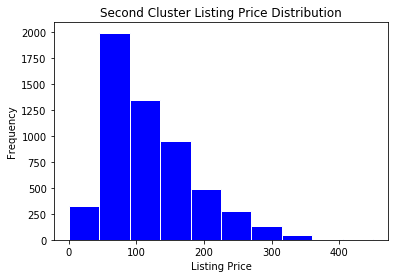

In [139]:
second_kmean_cluster["price"].hist(grid = False, edgecolor = "white", color = "b")
plt.title("Second Cluster Listing Price Distribution")
plt.xlabel("Listing Price")
plt.ylabel("Frequency")
plt.savefig("plots/second_cluster_price_dist.png")

In [71]:
third_kmean_cluster_filter = airbnb["kmeans_clusters"] == 2
third_kmean_cluster = airbnb[third_kmean_cluster_filter]
third_kmean_cluster.sample(15)

,Unnamed: 0,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,kmeans_clusters
12985,13559,10138870,Studio in Little Italy,52031473,Hanna,Manhattan,Nolita,40.72148,-73.99581,Private room,105,2,44,2019-05-30,1.03,1,35,2
2029,2142,987616,5 Bdrm Historic Brownstone Triplex,4018660,Emily,Brooklyn,Cobble Hill,40.68556,-73.99779,Entire home/apt,350,5,12,2016-08-20,0.17,1,0,2
29989,31179,24207931,Modern Prospect Park 3 bedroom Jewel,182326270,Samantha,Brooklyn,Prospect-Lefferts Gardens,40.65590,-73.95852,Entire home/apt,125,4,58,2019-06-21,3.80,1,78,2
4976,5285,3819656,SoHo/Village Studio,19644902,Russell,Manhattan,Greenwich Village,40.72774,-74.00004,Entire home/apt,165,2,2,2015-06-26,0.04,1,0,2
22563,23496,19018157,"Great and Cozy 2 BR in Glendale ,Queens NY",132698746,Joanna,Queens,Glendale,40.70388,-73.88012,Entire home/apt,100,2,117,2019-06-30,5.33,1,3,2
4505,4796,3400645,Charming 1BR Private GARDEN Apt!,178784,Michael,Brooklyn,Boerum Hill,40.68572,-73.98602,Entire home/apt,115,3,6,2017-09-15,0.10,1,0,2
16474,17176,13605171,"Bright, quiet room in 2br close to park/trains.",14751888,Mary,Manhattan,Upper West Side,40.78697,-73.97351,Private room,79,2,6,2017-08-15,0.16,1,0,2
42727,44471,34251664,Cozy private room 10 min to Columbia Univiersity,250207981,Junyi,Manhattan,Upper West Side,40.80378,-73.96619,Private room,50,14,1,2019-04-29,0.42,1,15,2
34735,36102,28692213,"One bedroom, with huge backyard for personal s...",195262476,Eleonora,Queens,Ditmars Steinway,40.77671,-73.90543,Entire home/apt,100,1,9,2019-03-17,1.03,1,2,2
40841,42500,32987851,Private Room in Cozy Nolita Apartment,13697041,Patrick,Manhattan,Nolita,40.72042,-73.99622,Private room,100,1,14,2019-06-30,5.25,1,30,2


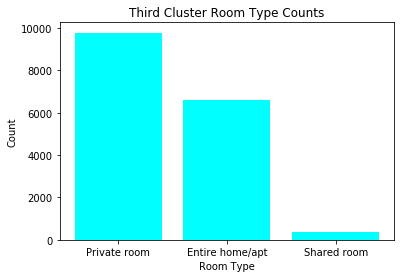

In [140]:
vc = third_kmean_cluster["room_type"].value_counts()
plt.bar(vc.index, vc.values, color = "cyan")
plt.title("Third Cluster Room Type Counts")
plt.xlabel("Room Type")
plt.ylabel("Count")
plt.savefig("plots/third_cluster_room_type.png")

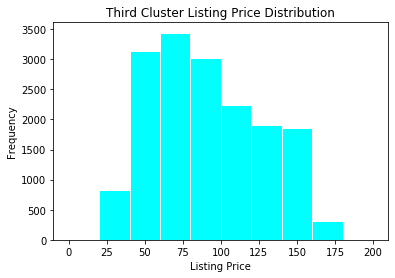

In [141]:
third_kmean_cluster["price"].hist(grid = False, edgecolor = "white", color = "cyan")
plt.title("Third Cluster Listing Price Distribution")
plt.xlabel("Listing Price")
plt.ylabel("Frequency")
plt.savefig("plots/third_cluster_price_dist.png")